In [85]:
import wandb
import pandas as pd
api = wandb.Api()

In [86]:
runs = {
    'codebert': "kostya-klol71/codcat/x1y5e7or",
    'codeberta': 'kostya-klol71/codcat/toeanotk',
    'graphcodebert': 'kostya-klol71/codcat/63olv7an',
    'roberta': 'kostya-klol71/codcat/810zcf6l',
    # 'textcnn': 'kostya-klol71/codcat/fnkkbn32'
}

In [87]:
def fetch_run_history(name, run):
    run = api.run(run)
    hist = run.scan_history(keys=['acc', 'global_step', 'eval_loss'])
    rep = pd.DataFrame([row for row in hist])
    hist = run.scan_history(keys=['Training loss', 'global_step'])
    train_loss = pd.DataFrame([row for row in hist])
    return rep, train_loss

In [88]:
import matplotlib.pyplot as plt

In [89]:
x1, y1 = fetch_run_history('codebert', runs['codebert'])
x2, y2 = fetch_run_history('codeberta', runs['codeberta'])
x3, y3 = fetch_run_history('graphcodebert', runs['graphcodebert'])
x4, y4 = fetch_run_history('roberta', runs['roberta'])

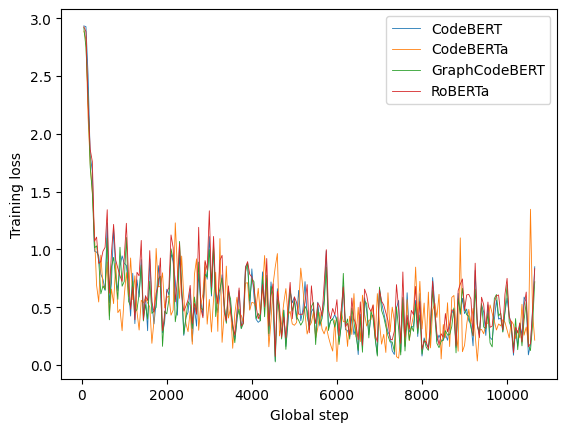

In [104]:
plt.plot(y1['global_step'], y1['Training loss'], linewidth=0.6, label='CodeBERT')
plt.plot(y2['global_step'], y2['Training loss'], linewidth=0.6, label='CodeBERTa')
plt.plot(y3['global_step'], y3['Training loss'], linewidth=0.6, label='GraphCodeBERT')
plt.plot(y4['global_step'], y4['Training loss'], linewidth=0.6, label='RoBERTa')
plt.xlabel('Global step')
plt.ylabel('Training loss')
plt.legend()
plt.savefig('train-loss.png')
plt.show()

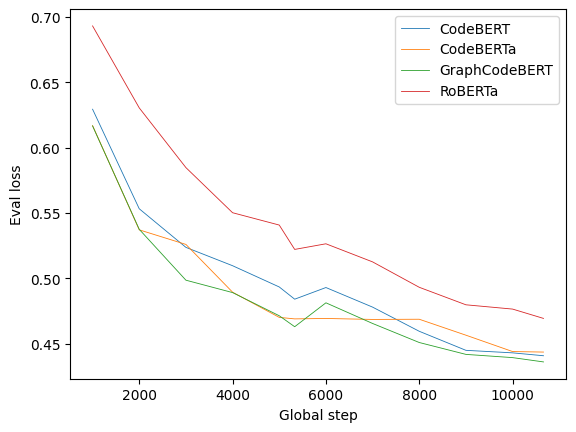

In [105]:
plt.plot(x1['global_step'], x1['eval_loss'], linewidth=0.6, label='CodeBERT')
plt.plot(x2['global_step'], x2['eval_loss'], linewidth=0.6, label='CodeBERTa')
plt.plot(x3['global_step'], x3['eval_loss'], linewidth=0.6, label='GraphCodeBERT')
plt.plot(x4['global_step'], x4['eval_loss'], linewidth=0.6, label='RoBERTa')
plt.xlabel('Global step')
plt.ylabel('Eval loss')
plt.legend()
plt.savefig('eval-loss.png')
plt.show()